<a href="https://colab.research.google.com/github/ahmedelalaoui142/Forecasting_financial_time_series/blob/main/INTERNSHIP1_Predecting_using_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
df = yf.download('MSFT', '2014-01-01', '2024-07-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,37.349998,37.400002,37.099998,37.160000,31.120731,30632200
2014-01-03,37.200001,37.220001,36.599998,36.910000,30.911367,31134800
2014-01-06,36.849998,36.889999,36.110001,36.130001,30.258135,43603700
2014-01-07,36.330002,36.490002,36.209999,36.410000,30.492630,35802800
2014-01-08,36.000000,36.139999,35.580002,35.759998,29.948269,59971700
...,...,...,...,...,...,...
2024-06-24,449.799988,452.750000,446.410004,447.670013,446.864594,15913700
2024-06-25,448.250000,451.420013,446.750000,450.950012,450.138672,16747500
2024-06-26,449.000000,453.600006,448.190002,452.160004,451.346497,16507000


In [ ]:
df.reset_index(inplace = True)
df = df[['Date','Close']]

In [ ]:
df

,Date,Close
0,2014-01-02,37.160000
1,2014-01-03,36.910000
2,2014-01-06,36.130001
3,2014-01-07,36.410000
4,2014-01-08,35.759998
...,...,...
2635,2024-06-24,447.670013
2636,2024-06-25,450.950012
2637,2024-06-26,452.160004
2638,2024-06-27,452.850006


In [ ]:
df.columns = ['ds','y']

In [ ]:
model = Prophet()

In [ ]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/99v3j90e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/hpbiz7v2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96548', 'data', 'file=/tmp/tmp7ts8lvhp/99v3j90e.json', 'init=/tmp/tmp7ts8lvhp/hpbiz7v2.json', 'output', 'file=/tmp/tmp7ts8lvhp/prophet_model6m5didja/prophet_model-20240922112611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:26:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:26:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
df.tail()

,ds,y
2635,2024-06-24,447.670013
2636,2024-06-25,450.950012
2637,2024-06-26,452.160004
2638,2024-06-27,452.850006
2639,2024-06-28,446.950012


In [ ]:
future_dates = model.make_future_dataframe(periods = 60)

In [ ]:
future_dates.tail()

,ds
2695,2024-08-23
2696,2024-08-24
2697,2024-08-25
2698,2024-08-26
2699,2024-08-27


In [ ]:
prediction = model.predict(future_dates)

In [ ]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2695,2024-08-23,432.854846,421.759131,454.362856,430.752896,433.566654,4.328575,4.328575,4.328575,0.562266,0.562266,0.562266,3.766308,3.766308,3.766308,0.0,0.0,0.0,437.183421
2696,2024-08-24,433.107093,418.538743,452.202307,430.944594,433.880023,2.695048,2.695048,2.695048,-1.014719,-1.014719,-1.014719,3.709767,3.709767,3.709767,0.0,0.0,0.0,435.802141
2697,2024-08-25,433.359340,418.887367,452.805522,431.078725,434.197902,2.628863,2.628863,2.628863,-1.014720,-1.014720,-1.014720,3.643583,3.643583,3.643583,0.0,0.0,0.0,435.988203
2698,2024-08-26,433.611587,420.646317,455.258887,431.140015,434.537548,3.882841,3.882841,3.882841,0.318008,0.318008,0.318008,3.564833,3.564833,3.564833,0.0,0.0,0.0,437.494427
2699,2024-08-27,433.863833,420.295516,454.755744,431.334520,434.884156,3.742464,3.742464,3.742464,0.271810,0.271810,0.271810,3.470654,3.470654,3.470654,0.0,0.0,0.0,437.606298


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


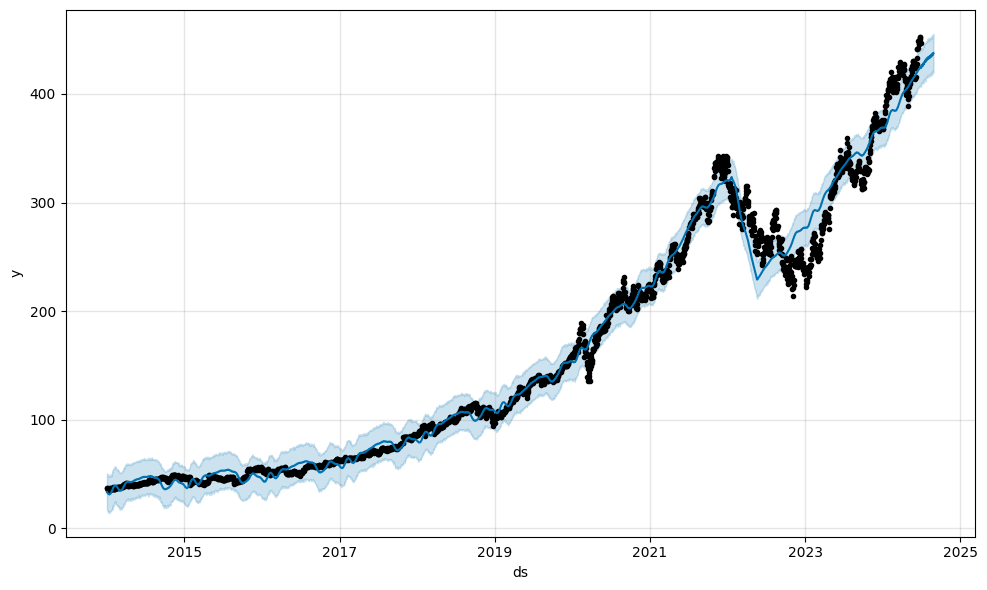

In [ ]:
fig = model.plot(prediction)

In [ ]:
from prophet.plot import plot_plotly
plot_plotly(model,prediction)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



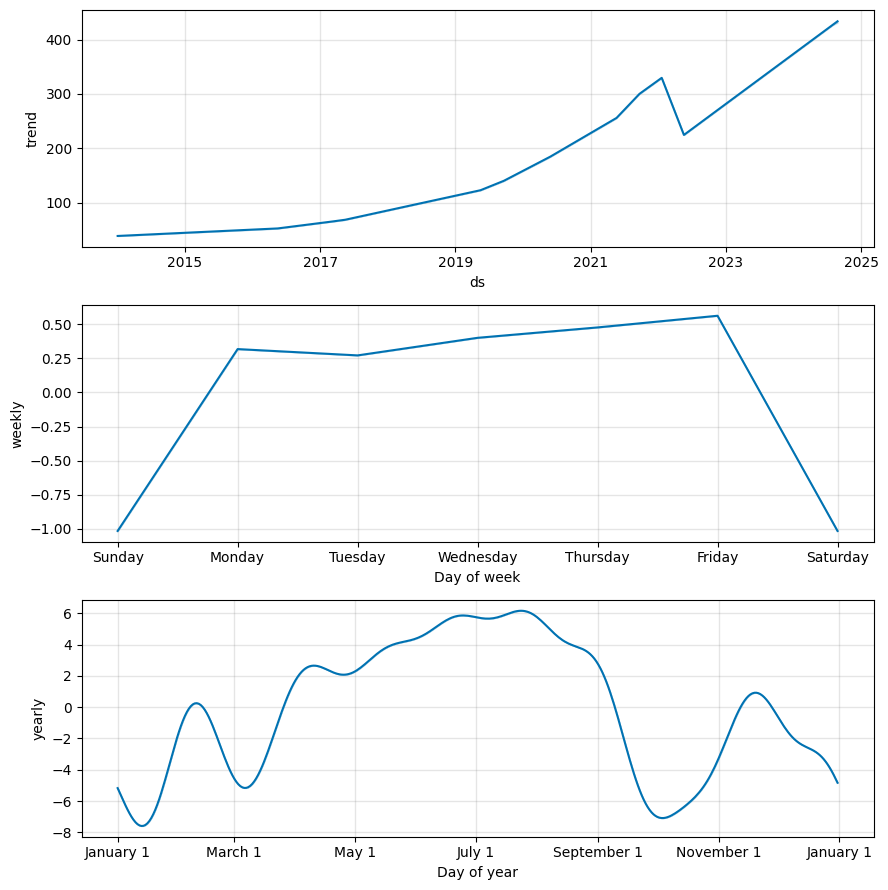

In [ ]:
fig2 = model.plot_components(prediction)

In [ ]:
predictions = model.predict(future_dates)

In [ ]:
actual_df = yf.download('MSFT', '2024-07-01', '2024-09-01')
actual_df.reset_index(inplace=True)
actual_df = actual_df[['Date', 'Close']]
actual_df.columns = ['ds', 'actual']
merged_df = pd.merge(predictions[['ds', 'yhat']], actual_df, on='ds', how='left')

[*********************100%***********************]  1 of 1 completed


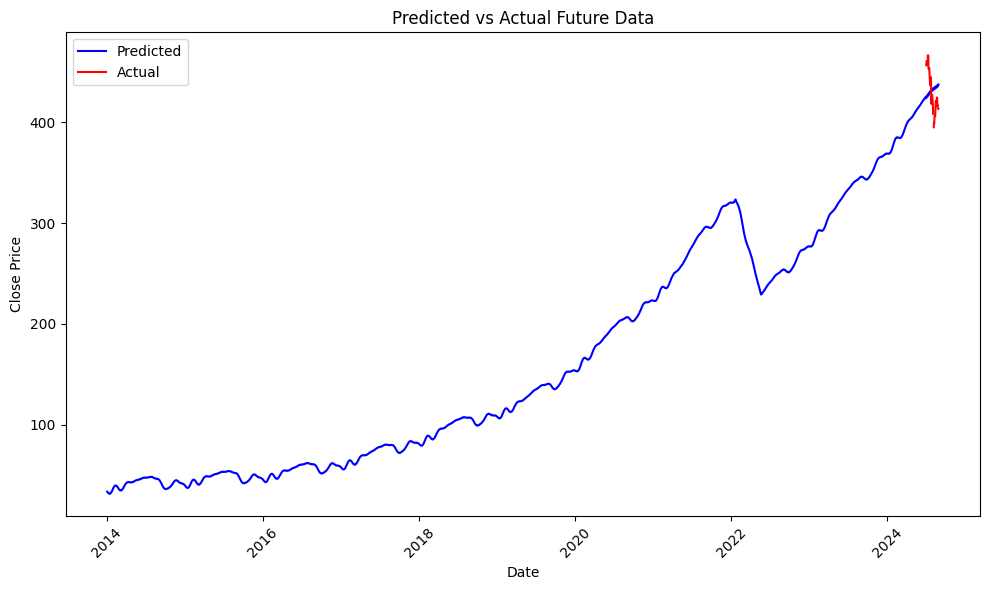

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df['ds'], merged_df['yhat'], label='Predicted', color='blue')
plt.plot(merged_df['ds'], merged_df['actual'], label='Actual', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Predicted vs Actual Future Data')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

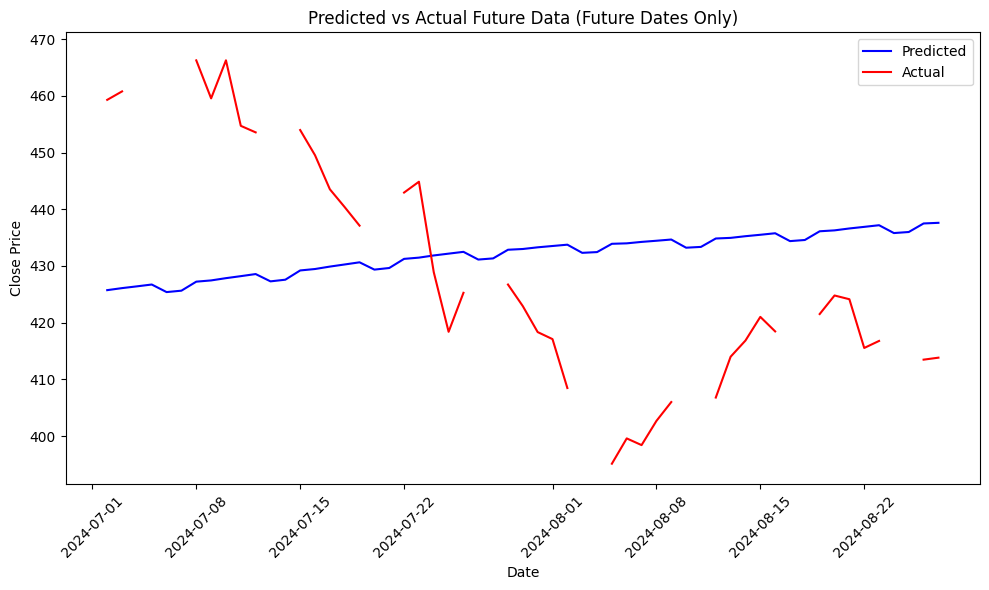

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
future_df = merged_df[merged_df['ds'] > '2024-07-01']

# Step 7: Plot the predicted vs actual future data
plt.figure(figsize=(10, 6))
plt.plot(future_df['ds'], future_df['yhat'], label='Predicted', color='blue')
plt.plot(future_df['ds'], future_df['actual'], label='Actual', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Predicted vs Actual Future Data (Future Dates Only)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Interactive plot using plotly for future dates only
plot_plotly(model, predictions[predictions['ds'] > '2024-07-01'])

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Ensure future_df contains only rows with actual values (no NaNs)
future_df = future_df.dropna(subset=['actual'])

# Calculate RMSE
mse = mean_squared_error(future_df['actual'], future_df['yhat'])
rmse = np.sqrt(mse)

# Calculate MAPE
mape = np.mean(np.abs((future_df['actual'] - future_df['yhat']) / future_df['actual'])) * 100

# Print the performance metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Root Mean Squared Error (RMSE): 23.92922233846021
Mean Absolute Percentage Error (MAPE): 5.025526310817008%


In [ ]:
model = Prophet(changepoint_prior_scale=0.05)  # You can try values like 0.01, 0.1, etc.
model.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/o5lzl4d6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/jsm6_49v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41360', 'data', 'file=/tmp/tmp7ts8lvhp/o5lzl4d6.json', 'init=/tmp/tmp7ts8lvhp/jsm6_49v.json', 'output', 'file=/tmp/tmp7ts8lvhp/prophet_modelhjm2t5wt/prophet_model-20240922112631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:26:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:26:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model = Prophet( weekly_seasonality=True)
model.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/g3g662ja.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/ml94an1c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45049', 'data', 'file=/tmp/tmp7ts8lvhp/g3g662ja.json', 'init=/tmp/tmp7ts8lvhp/ml94an1c.json', 'output', 'file=/tmp/tmp7ts8lvhp/prophet_modeldi2y9bat/prophet_model-20240922112634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:26:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:26:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)


In [ ]:
model = Prophet(seasonality_prior_scale=10)  # Default is 10, try increasing or decreasing
model.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/fct8siqa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/k6js099k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82477', 'data', 'file=/tmp/tmp7ts8lvhp/fct8siqa.json', 'init=/tmp/tmp7ts8lvhp/k6js099k.json', 'output', 'file=/tmp/tmp7ts8lvhp/prophet_modelv9llvnyq/prophet_model-20240922112637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:26:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:26:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(model, initial='3650 days', period='180 days', horizon='60 days')
df_p = performance_metrics(df_cv)
print(df_p[['horizon', 'rmse', 'mape']])


INFO:prophet:Making 1 forecasts with cutoffs between 2024-04-29 00:00:00 and 2024-04-29 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/rjzcy9we.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/5l8yhjzl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51862', 'data', 'file=/tmp/tmp7ts8lvhp/rjzcy9we.json', 'init=/tmp/tmp7ts8lvhp/5l8yhjzl.json', 'output', 'file=/tmp/tmp7ts8lvhp/prophet_modelaqjylgz0/prophet_model-20240922112640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:26:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:26:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


   horizon       rmse      mape
0   4 days   9.137203  0.017984
1   7 days  14.693682  0.031267
2   8 days  17.345417  0.040014
3   9 days  19.684133  0.047590
4  10 days  20.975878  0.050828
5  11 days  21.234970  0.051349
6  14 days  22.147100  0.053518
7  15 days  23.557723  0.056732
8  16 days  26.308419  0.062450
9  17 days  27.703933  0.065579
10 18 days  29.024885  0.068838
11 21 days  30.891794  0.072985
12 22 days  32.251658  0.075632
13 23 days  34.387833  0.080134
14 24 days  35.640982  0.083136
15 25 days  36.567477  0.085129
16 29 days  36.450120  0.084794
17 30 days  35.657013  0.083035
18 31 days  32.857029  0.075100
19 32 days  28.951219  0.065720
20 35 days  24.213932  0.055365
21 36 days  19.636968  0.047269
22 37 days  21.904670  0.051637
23 38 days  23.987061  0.056030
24 39 days  26.070147  0.061231
25 42 days  28.460969  0.066878
26 43 days  30.458239  0.070848
27 44 days  34.652951  0.078890
28 45 days  38.632934  0.087581
29 46 days  41.841863  0.094773
30 49 da

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/shak6_5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/q6v_vags.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18547', 'data', 'file=/tmp/tmp7ts8lvhp/shak6_5n.json', 'init=/tmp/tmp7ts8lvhp/q6v_vags.json', 'output', 'file=/tmp/tmp7ts8lvhp/prophet_modeld6ib28hy/prophet_model-20240922112642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:26:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:26:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
[*********************100%***********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonal

   changepoint_prior_scale       RMSE       MAPE
0                    0.001  57.236790  12.046906
1                    0.010  33.240740   5.751113
2                    0.050  23.929222   5.025526
3                    0.100  23.891672   5.047626
4                    0.500  23.585203   5.014230
5                    1.000  23.738260   5.039563


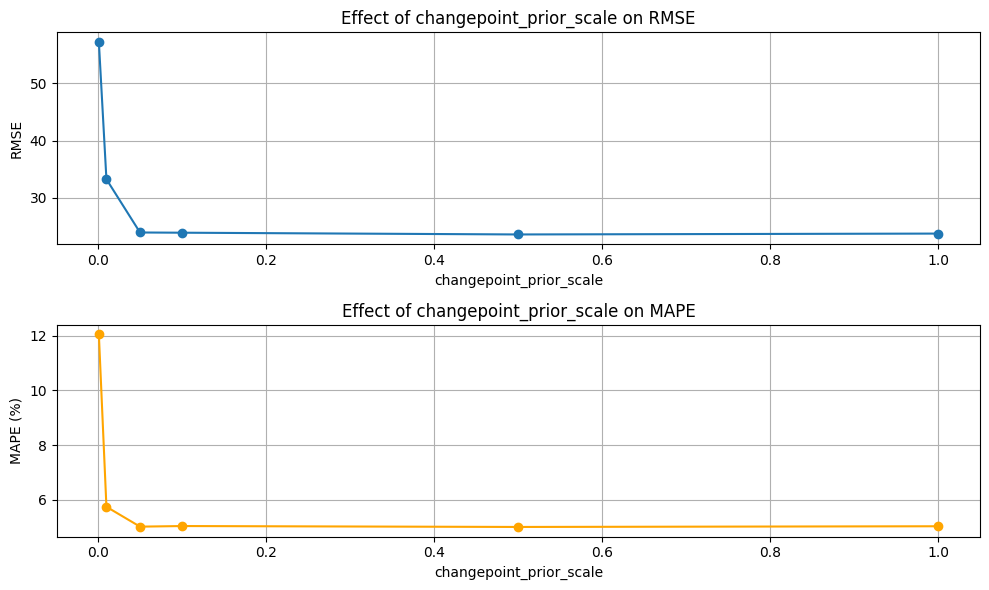

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate RMSE and MAPE
def evaluate_prophet(df, periods=60, changepoint_prior_scale=0.05):
    model = Prophet(changepoint_prior_scale=changepoint_prior_scale)
    model.fit(df)
    future_dates = model.make_future_dataframe(periods=periods)
    predictions = model.predict(future_dates)

    # Ensure future_df contains only rows with actual values (no NaNs)
    actual_df = yf.download('MSFT', '2024-07-01', '2024-09-15')
    actual_df.reset_index(inplace=True)
    actual_df = actual_df[['Date', 'Close']]
    actual_df.columns = ['ds', 'actual']

    # Merge predictions and actual values
    merged_df = pd.merge(predictions[['ds', 'yhat']], actual_df, on='ds', how='left')
    future_df = merged_df[merged_df['ds'] > '2024-07-01'].dropna(subset=['actual'])

    # Calculate RMSE and MAPE
    mse = mean_squared_error(future_df['actual'], future_df['yhat'])
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((future_df['actual'] - future_df['yhat']) / future_df['actual'])) * 100

    return rmse, mape

# Test different values of changepoint_prior_scale
changepoint_values = [0.001, 0.01, 0.05, 0.1, 0.5, 1.0]
results = []

for cps in changepoint_values:
    rmse, mape = evaluate_prophet(df, changepoint_prior_scale=cps)
    results.append((cps, rmse, mape))

# Display the results
results_df = pd.DataFrame(results, columns=['changepoint_prior_scale', 'RMSE', 'MAPE'])
print(results_df)

# Plotting results to visualize the effect of changepoint_prior_scale
plt.figure(figsize=(10, 6))

# Plot RMSE
plt.subplot(2, 1, 1)
plt.plot(results_df['changepoint_prior_scale'], results_df['RMSE'], marker='o')
plt.title('Effect of changepoint_prior_scale on RMSE')
plt.xlabel('changepoint_prior_scale')
plt.ylabel('RMSE')
plt.grid(True)

# Plot MAPE
plt.subplot(2, 1, 2)
plt.plot(results_df['changepoint_prior_scale'], results_df['MAPE'], marker='o', color='orange')
plt.title('Effect of changepoint_prior_scale on MAPE')
plt.xlabel('changepoint_prior_scale')
plt.ylabel('MAPE (%)')
plt.grid(True)

plt.tight_layout()
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/k7nopmy3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/f5iqzk1_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70247', 'data', 'file=/tmp/tmp7ts8lvhp/k7nopmy3.json', 'init=/tmp/tmp7ts8lvhp/f5iqzk1_.json', 'output', 'file=/tmp/tmp7ts8lvhp/prophet_modelpeevi9aq/prophet_model-20240922112657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:26:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:26:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
[*********************100%***********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonal

Optimal changepoint_prior_scale for RMSE: 0.5
Optimal changepoint_prior_scale for MAPE: 0.035789473684210524


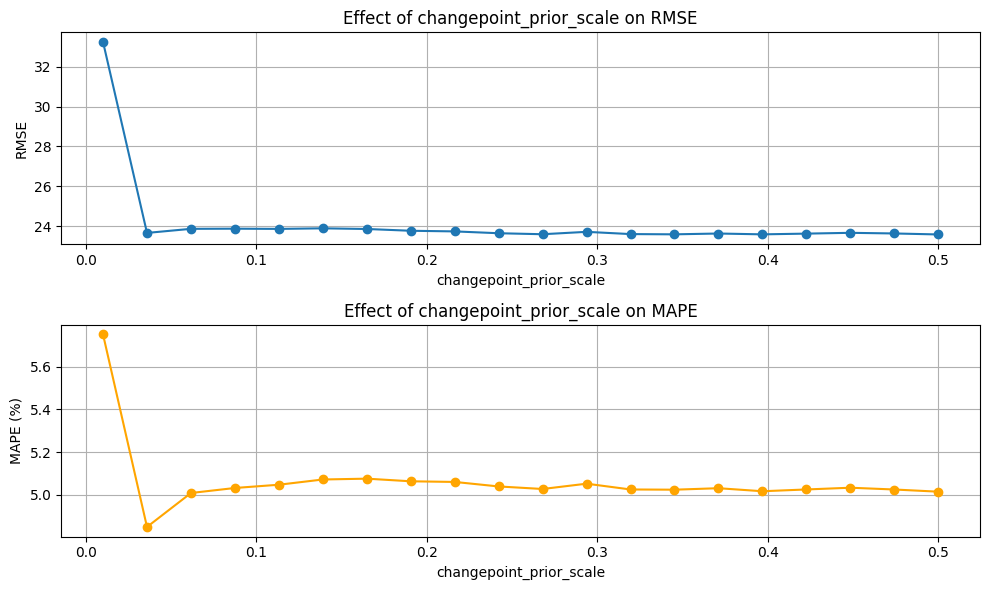

    changepoint_prior_scale       RMSE      MAPE
0                  0.010000  33.240740  5.751113
1                  0.035789  23.662114  4.848905
2                  0.061579  23.867598  5.008039
3                  0.087368  23.875002  5.031573
4                  0.113158  23.864248  5.046824
5                  0.138947  23.892781  5.071345
6                  0.164737  23.859510  5.075275
7                  0.190526  23.770277  5.062932
8                  0.216316  23.738256  5.059881
9                  0.242105  23.646606  5.038742
10                 0.267895  23.596344  5.026846
11                 0.293684  23.716326  5.051693
12                 0.319474  23.603887  5.024587
13                 0.345263  23.591399  5.023563
14                 0.371053  23.632309  5.030517
15                 0.396842  23.590431  5.016292
16                 0.422632  23.627204  5.024626
17                 0.448421  23.667109  5.032812
18                 0.474211  23.635022  5.024452
19                 0

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate RMSE and MAPE
def evaluate_prophet(df, periods=60, changepoint_prior_scale=0.05):
    model = Prophet(changepoint_prior_scale=changepoint_prior_scale)
    model.fit(df)
    future_dates = model.make_future_dataframe(periods=periods)
    predictions = model.predict(future_dates)

    # Ensure future_df contains only rows with actual values (no NaNs)
    actual_df = yf.download('MSFT', '2024-07-01', '2024-09-15')
    actual_df.reset_index(inplace=True)
    actual_df = actual_df[['Date', 'Close']]
    actual_df.columns = ['ds', 'actual']

    # Merge predictions and actual values
    merged_df = pd.merge(predictions[['ds', 'yhat']], actual_df, on='ds', how='left')
    future_df = merged_df[merged_df['ds'] > '2024-07-01'].dropna(subset=['actual'])

    # Calculate RMSE and MAPE
    mse = mean_squared_error(future_df['actual'], future_df['yhat'])
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((future_df['actual'] - future_df['yhat']) / future_df['actual'])) * 100

    return rmse, mape

# More granular grid search for changepoint_prior_scale
changepoint_values = np.linspace(0.01, 0.5, 20)  # Testing 20 values between 0.01 and 0.5
results = []

for cps in changepoint_values:
    rmse, mape = evaluate_prophet(df, changepoint_prior_scale=cps)
    results.append((cps, rmse, mape))

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['changepoint_prior_scale', 'RMSE', 'MAPE'])

# Find the optimal changepoint_prior_scale for RMSE and MAPE
best_rmse_idx = results_df['RMSE'].idxmin()
best_mape_idx = results_df['MAPE'].idxmin()

best_rmse_value = results_df.loc[best_rmse_idx, 'changepoint_prior_scale']
best_mape_value = results_df.loc[best_mape_idx, 'changepoint_prior_scale']

print(f"Optimal changepoint_prior_scale for RMSE: {best_rmse_value}")
print(f"Optimal changepoint_prior_scale for MAPE: {best_mape_value}")

# Plotting results to visualize the effect of changepoint_prior_scale
plt.figure(figsize=(10, 6))

# Plot RMSE
plt.subplot(2, 1, 1)
plt.plot(results_df['changepoint_prior_scale'], results_df['RMSE'], marker='o')
plt.title('Effect of changepoint_prior_scale on RMSE')
plt.xlabel('changepoint_prior_scale')
plt.ylabel('RMSE')
plt.grid(True)

# Plot MAPE
plt.subplot(2, 1, 2)
plt.plot(results_df['changepoint_prior_scale'], results_df['MAPE'], marker='o', color='orange')
plt.title('Effect of changepoint_prior_scale on MAPE')
plt.xlabel('changepoint_prior_scale')
plt.ylabel('MAPE (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Display the results DataFrame
print(results_df)


[*********************100%***********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/o87s8fx4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/17uct706.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67672', 'data', 'file=/tmp/tmp7ts8lvhp/o87s8fx4.json', 'init=/tmp/tmp7ts8lvhp/17uct706.json', 'output', 'file=/tmp/tmp7ts8lvhp/prophet_model42nrmx0s/prophet_model-20240922112749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:27:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:27:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
[*********************100%***********************]  1 of 1 completed


Root Mean Squared Error (RMSE): 23.64820727695708
Mean Absolute Percentage Error (MAPE): 4.8280833904668565%


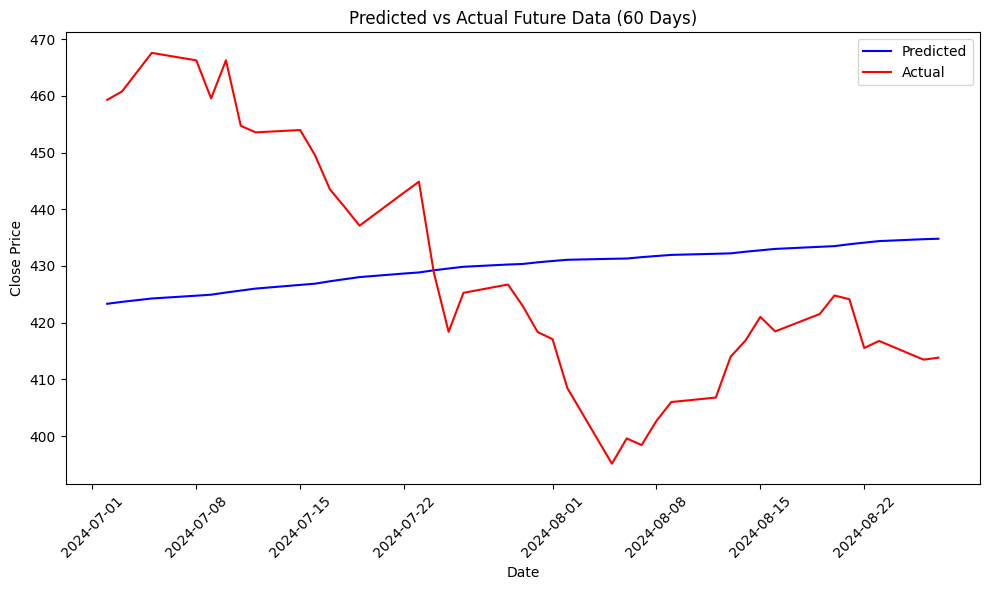

In [ ]:
from prophet import Prophet
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 1: Download historical data
df = yf.download('MSFT', '2014-01-01', '2024-07-01')
df.reset_index(inplace=True)
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']

# Step 2: Create and fit the Prophet model with the optimal changepoint_prior_scale
model = Prophet(changepoint_prior_scale=0.035789)
model.fit(df)

# Step 3: Make future predictions (60 days ahead)
future_dates = model.make_future_dataframe(periods=60)
predictions = model.predict(future_dates)

# Step 4: Download actual future data for comparison
actual_df = yf.download('MSFT', '2024-07-01', '2024-09-15')
actual_df.reset_index(inplace=True)
actual_df = actual_df[['Date', 'Close']]
actual_df.columns = ['ds', 'actual']

# Step 5: Merge predicted and actual data for evaluation
merged_df = pd.merge(predictions[['ds', 'yhat']], actual_df, on='ds', how='left')
future_df = merged_df[merged_df['ds'] > '2024-07-01'].dropna(subset=['actual'])

# Step 6: Calculate RMSE and MAPE
mse = mean_squared_error(future_df['actual'], future_df['yhat'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((future_df['actual'] - future_df['yhat']) / future_df['actual'])) * 100

# Step 7: Print performance metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Step 8: Plot the predicted vs actual future data
plt.figure(figsize=(10, 6))
plt.plot(future_df['ds'], future_df['yhat'], label='Predicted', color='blue')
plt.plot(future_df['ds'], future_df['actual'], label='Actual', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Predicted vs Actual Future Data (60 Days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/4ob4fx0w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/xfzocvld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12476', 'data', 'file=/tmp/tmp7ts8lvhp/4ob4fx0w.json', 'init=/tmp/tmp7ts8lvhp/xfzocvld.json', 'output', 'file=/tmp/tmp7ts8lvhp/prophet_model_iostnzu/prophet_model-20240922112751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:27:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:27:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
[*********************100%***********************]  1 of 1 completed


Root Mean Squared Error (RMSE): 22.818786773686085
Mean Absolute Percentage Error (MAPE): 4.774637114834496%


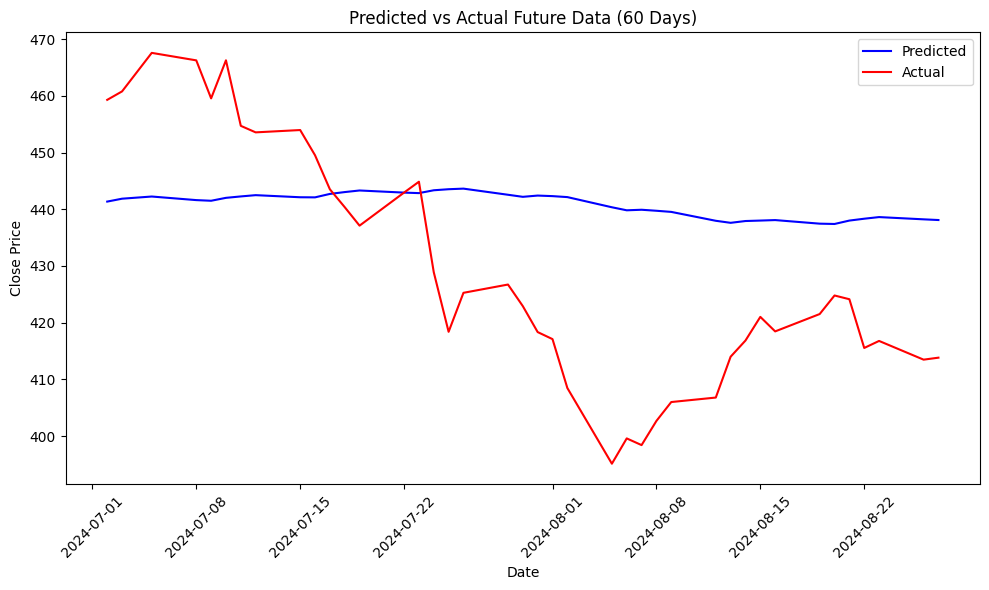

In [ ]:
from prophet import Prophet
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 1: Download historical data
df = yf.download('MSFT', '2014-01-01', '2024-07-01')
df.reset_index(inplace=True)
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']

# Step 2: Create a Prophet model with weekly and yearly seasonality, and multiplicative mode
model = Prophet(
    changepoint_prior_scale=0.035789,
    weekly_seasonality=True,   # Enable weekly seasonality
    yearly_seasonality=True,   # Enable yearly seasonality
    seasonality_mode='multiplicative'  # Test multiplicative seasonality
)

# Step 3: Fit the model
model.fit(df)

# Step 4: Make future predictions (60 days ahead)
future_dates = model.make_future_dataframe(periods=60)
predictions = model.predict(future_dates)

# Step 5: Download actual future data for comparison
actual_df = yf.download('MSFT', '2024-07-01', '2024-09-15')
actual_df.reset_index(inplace=True)
actual_df = actual_df[['Date', 'Close']]
actual_df.columns = ['ds', 'actual']

# Step 6: Merge predicted and actual data for evaluation
merged_df = pd.merge(predictions[['ds', 'yhat']], actual_df, on='ds', how='left')
future_df = merged_df[merged_df['ds'] > '2024-07-01'].dropna(subset=['actual'])

# Step 7: Calculate RMSE and MAPE
mse = mean_squared_error(future_df['actual'], future_df['yhat'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((future_df['actual'] - future_df['yhat']) / future_df['actual'])) * 100

# Step 8: Print performance metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Step 9: Plot the predicted vs actual future data
plt.figure(figsize=(10, 6))
plt.plot(future_df['ds'], future_df['yhat'], label='Predicted', color='blue')
plt.plot(future_df['ds'], future_df['actual'], label='Actual', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Predicted vs Actual Future Data (60 Days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/446f3fte.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/2bsbwj7j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51625', 'data', 'file=/tmp/tmp7ts8lvhp/446f3fte.json', 'init=/tmp/tmp7ts8lvhp/2bsbwj7j.json', 'output', 'file=/tmp/tmp7ts8lvhp/prophet_modelppit9smt/prophet_model-20240922112756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:27:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:27:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
[*********************100%***********************]  1 of 1 completed


Root Mean Squared Error (RMSE): 20.14168022610398
Mean Absolute Percentage Error (MAPE): 4.149711219550567%


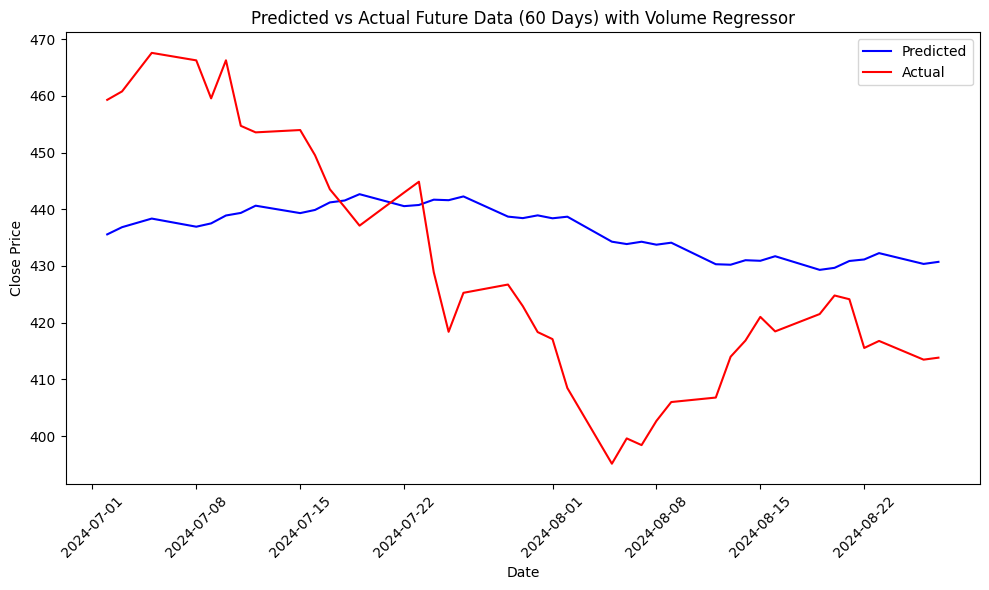

In [ ]:
from prophet import Prophet
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 1: Download historical data with volume
df = yf.download('MSFT', '2014-01-01', '2024-07-01')
df.reset_index(inplace=True)
df = df[['Date', 'Close', 'Volume']]  # Add volume as a regressor
df.columns = ['ds', 'y', 'volume']

# Step 2: Create a Prophet model and add volume as a regressor
model = Prophet(
    changepoint_prior_scale=0.035789,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='multiplicative'
)
model.add_regressor('volume')  # Adding volume as an external regressor

# Step 3: Fit the model
model.fit(df)

# Step 4: Make future predictions (60 days ahead)
future_dates = model.make_future_dataframe(periods=60)
future_dates['volume'] = df['volume'].iloc[-1]  # Set future volume to last known volume as a placeholder
predictions = model.predict(future_dates)

# Step 5: Download actual future data for comparison
actual_df = yf.download('MSFT', '2024-07-01', '2024-09-15')
actual_df.reset_index(inplace=True)
actual_df = actual_df[['Date', 'Close']]
actual_df.columns = ['ds', 'actual']

# Step 6: Merge predicted and actual data for evaluation
merged_df = pd.merge(predictions[['ds', 'yhat']], actual_df, on='ds', how='left')
future_df = merged_df[merged_df['ds'] > '2024-07-01'].dropna(subset=['actual'])

# Step 7: Calculate RMSE and MAPE
mse = mean_squared_error(future_df['actual'], future_df['yhat'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((future_df['actual'] - future_df['yhat']) / future_df['actual'])) * 100

# Step 8: Print performance metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Step 9: Plot the predicted vs actual future data
plt.figure(figsize=(10, 6))
plt.plot(future_df['ds'], future_df['yhat'], label='Predicted', color='blue')
plt.plot(future_df['ds'], future_df['actual'], label='Actual', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Predicted vs Actual Future Data (60 Days) with Volume Regressor')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/27qcu0dp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/c1agpwnq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75604', 'data', 'file=/tmp/tmp7ts8lvhp/27qcu0dp.json', 'init=/tmp/tmp7ts8lvhp/c1agpwnq.json', 'output', 'file=/tmp/tmp7ts8lvhp/prophet_model_3aufihk/prophet_model-20240922112801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:28:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:28:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonal

Root Mean Squared Error (RMSE): 22.911689387382374
Mean Absolute Percentage Error (MAPE): 4.794100537712899%


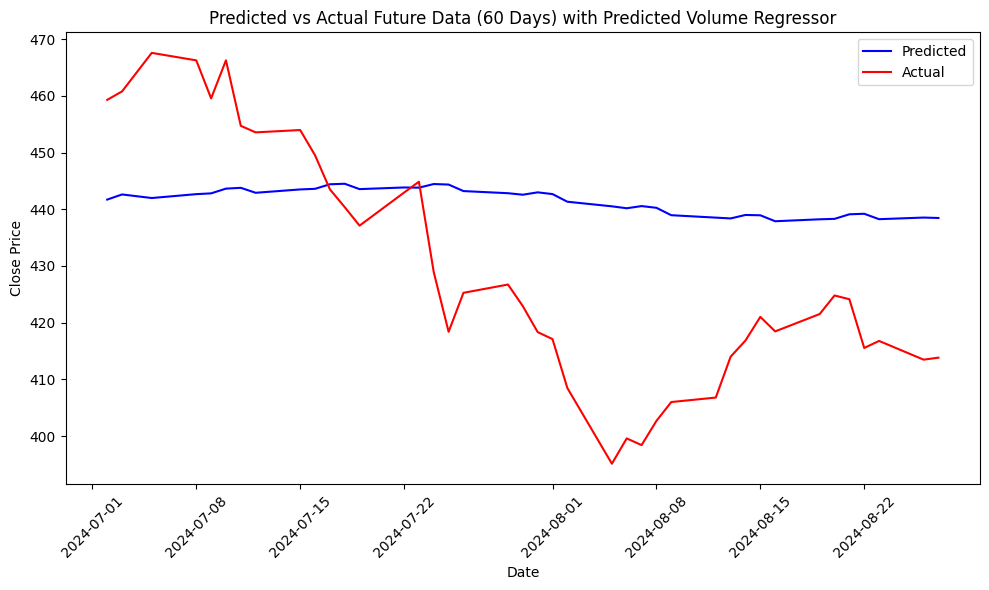

In [ ]:
from prophet import Prophet
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 1: Download historical data with volume
df = yf.download('MSFT', '2014-01-01', '2024-07-01')
df.reset_index(inplace=True)
df = df[['Date', 'Close', 'Volume']]
df.columns = ['ds', 'y', 'volume']

# Step 2: Build a separate model to predict future volume using Prophet
volume_df = df[['ds', 'volume']].copy()
volume_df.columns = ['ds', 'y']  # Prophet requires 'y' as the target column for volume

# Step 3: Fit the Prophet model for volume prediction
volume_model = Prophet()
volume_model.fit(volume_df)

# Step 4: Predict future volume for the next 60 days
future_volume = volume_model.make_future_dataframe(periods=60)
volume_forecast = volume_model.predict(future_volume)

# Step 5: Merge the volume forecast into the main dataframe
future_volume['volume'] = volume_forecast['yhat']  # Use the predicted volume for the next 60 days

# Step 6: Add the predicted future volume to the future_dates dataframe for stock price prediction
future_dates = future_volume[['ds', 'volume']].copy()

# Step 7: Create a Prophet model to predict stock prices with the predicted volume
stock_model = Prophet(
    changepoint_prior_scale=0.035789,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='multiplicative'
)
stock_model.add_regressor('volume')  # Add volume as a regressor

# Fit the model on the historical stock price and volume data
stock_model.fit(df)

# Step 8: Make future stock price predictions using the predicted volume data
predictions = stock_model.predict(future_dates)

# Step 9: Download actual future data for comparison
actual_df = yf.download('MSFT', '2024-07-01', '2024-09-15')
actual_df.reset_index(inplace=True)
actual_df = actual_df[['Date', 'Close']]
actual_df.columns = ['ds', 'actual']

# Step 10: Merge predicted and actual data for evaluation
merged_df = pd.merge(predictions[['ds', 'yhat']], actual_df, on='ds', how='left')
future_df = merged_df[merged_df['ds'] > '2024-07-01'].dropna(subset=['actual'])

# Step 11: Calculate RMSE and MAPE
mse = mean_squared_error(future_df['actual'], future_df['yhat'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((future_df['actual'] - future_df['yhat']) / future_df['actual'])) * 100

# Step 12: Print performance metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Step 13: Plot the predicted vs actual future data
plt.figure(figsize=(10, 6))
plt.plot(future_df['ds'], future_df['yhat'], label='Predicted', color='blue')
plt.plot(future_df['ds'], future_df['actual'], label='Actual', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Predicted vs Actual Future Data (60 Days) with Predicted Volume Regressor')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/vqxqztmz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/squtsdpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4342', 'data', 'file=/tmp/tmp7ts8lvhp/vqxqztmz.json', 'init=/tmp/tmp7ts8lvhp/squtsdpl.json', 'output', 'file=/tmp/tmp7ts8lvhp/prophet_model_215lx2u/prophet_model-20240922112806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:28:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:28:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
[*********************100%***********************]  1 of 1 completed
INFO:

    changepoint_prior_scale  seasonality_prior_scale  fourier_order  \
0                      0.01                        5              3   
1                      0.01                        5              5   
2                      0.01                        5              7   
3                      0.01                       10              3   
4                      0.01                       10              5   
5                      0.01                       10              7   
6                      0.01                       15              3   
7                      0.01                       15              5   
8                      0.01                       15              7   
9                      0.05                        5              3   
10                     0.05                        5              5   
11                     0.05                        5              7   
12                     0.05                       10              3   
13    

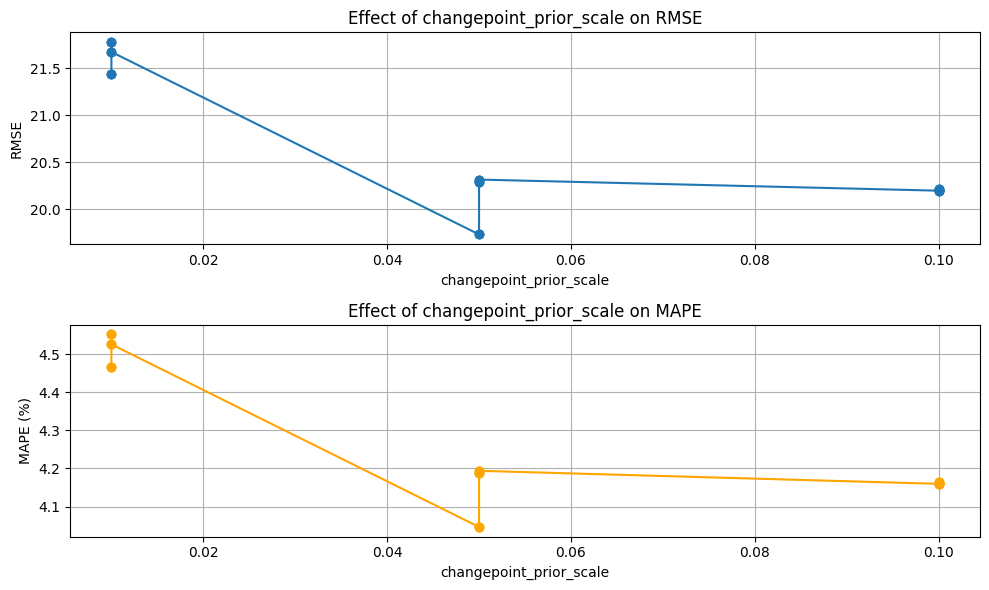

In [ ]:
from prophet import Prophet
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 1: Download historical data with volume
df = yf.download('MSFT', '2014-01-01', '2024-07-01')
df.reset_index(inplace=True)
df = df[['Date', 'Close', 'Volume']]
df.columns = ['ds', 'y', 'volume']

# Function to evaluate different parameters
def evaluate_prophet(df, changepoint_prior_scale=0.05, seasonality_prior_scale=10, fourier_order=5):
    # Step 2: Create a Prophet model with seasonal and changepoint adjustments
    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        weekly_seasonality=True,
        yearly_seasonality=True,
        seasonality_mode='multiplicative'
    )

    # Adjust fourier orders
    model.add_seasonality(name='weekly', period=7, fourier_order=fourier_order)
    model.add_seasonality(name='yearly', period=365.25, fourier_order=fourier_order)
    model.add_regressor('volume')  # Add volume as a regressor

    # Step 3: Fit the model
    model.fit(df)

    # Step 4: Make future predictions (60 days ahead)
    future_dates = model.make_future_dataframe(periods=60)
    future_dates['volume'] = df['volume'].iloc[-1]  # Use the last known volume as a placeholder
    predictions = model.predict(future_dates)

    # Step 5: Download actual future data for comparison
    actual_df = yf.download('MSFT', '2024-07-01', '2024-09-15')
    actual_df.reset_index(inplace=True)
    actual_df = actual_df[['Date', 'Close']]
    actual_df.columns = ['ds', 'actual']

    # Step 6: Merge predicted and actual data for evaluation
    merged_df = pd.merge(predictions[['ds', 'yhat']], actual_df, on='ds', how='left')
    future_df = merged_df[merged_df['ds'] > '2024-07-01'].dropna(subset=['actual'])

    # Step 7: Calculate RMSE and MAPE
    mse = mean_squared_error(future_df['actual'], future_df['yhat'])
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((future_df['actual'] - future_df['yhat']) / future_df['actual'])) * 100

    return rmse, mape

# Tuning parameters
changepoint_values = [0.01, 0.05, 0.1]
seasonality_values = [5, 10, 15]
fourier_orders = [3, 5, 7]

# Step 8: Test various combinations of parameters
results = []
for changepoint_prior in changepoint_values:
    for seasonality_prior in seasonality_values:
        for fourier_order in fourier_orders:
            rmse, mape = evaluate_prophet(df, changepoint_prior_scale=changepoint_prior, seasonality_prior_scale=seasonality_prior, fourier_order=fourier_order)
            results.append((changepoint_prior, seasonality_prior, fourier_order, rmse, mape))

# Step 9: Display results
results_df = pd.DataFrame(results, columns=['changepoint_prior_scale', 'seasonality_prior_scale', 'fourier_order', 'RMSE', 'MAPE'])
print(results_df)

# Step 10: Plot the best results
plt.figure(figsize=(10, 6))

# Plot RMSE
plt.subplot(2, 1, 1)
plt.plot(results_df['changepoint_prior_scale'], results_df['RMSE'], marker='o', label='RMSE')
plt.title('Effect of changepoint_prior_scale on RMSE')
plt.xlabel('changepoint_prior_scale')
plt.ylabel('RMSE')
plt.grid(True)

# Plot MAPE
plt.subplot(2, 1, 2)
plt.plot(results_df['changepoint_prior_scale'], results_df['MAPE'], marker='o', color='orange', label='MAPE')
plt.title('Effect of changepoint_prior_scale on MAPE')
plt.xlabel('changepoint_prior_scale')
plt.ylabel('MAPE (%)')
plt.grid(True)

plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/t9avjwuf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/9icz11ny.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41350', 'data', 'file=/tmp/tmp7ts8lvhp/t9avjwuf.json', 'init=/tmp/tmp7ts8lvhp/9icz11ny.json', 'output', 'file=/tmp/tmp7ts8lvhp/prophet_modelv6evn4du/prophet_model-20240922112951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:29:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:29:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
[*********************100%***********************]  1 of 1 completed


Root Mean Squared Error (RMSE): 20.034263169526568
Mean Absolute Percentage Error (MAPE): 4.1233713214592305%


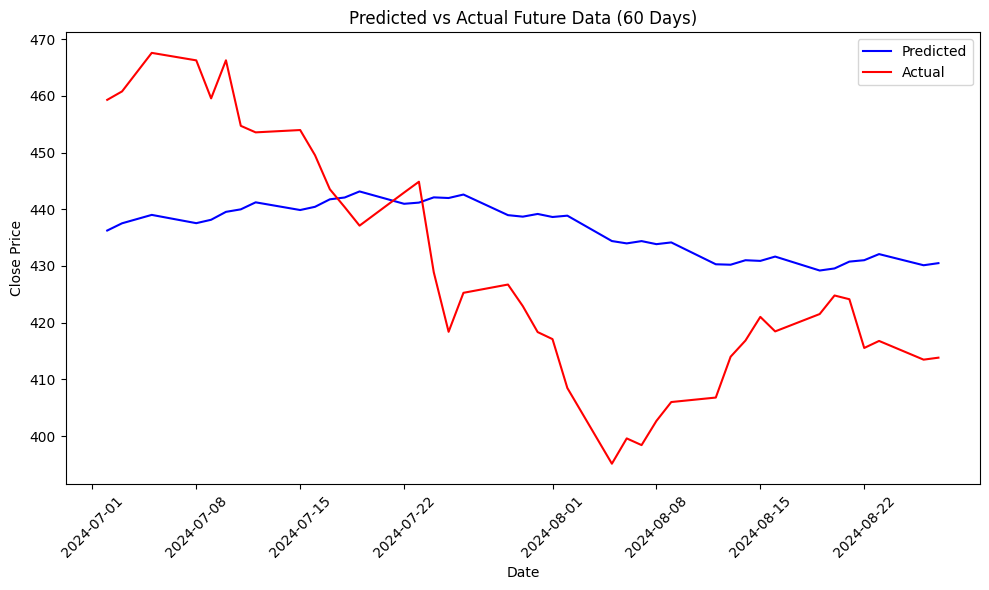

In [ ]:
from prophet import Prophet
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 1: Download historical data with volume
df = yf.download('MSFT', '2014-01-01', '2024-07-01')
df.reset_index(inplace=True)
df = df[['Date', 'Close', 'Volume']]
df.columns = ['ds', 'y', 'volume']

# Step 2: Train the model with the best parameters
model = Prophet(
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=5,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='multiplicative'
)
model.add_regressor('volume')

# Fit the model
model.fit(df)

# Step 3: Make future predictions (60 days ahead)
future_dates = model.make_future_dataframe(periods=60)
future_dates['volume'] = df['volume'].iloc[-1]  # Use the last known volume as a placeholder
predictions = model.predict(future_dates)

# Step 4: Download actual future data for comparison
actual_df = yf.download('MSFT', '2024-07-01', '2024-09-15')
actual_df.reset_index(inplace=True)
actual_df = actual_df[['Date', 'Close']]
actual_df.columns = ['ds', 'actual']

# Step 5: Merge predicted and actual data for evaluation
merged_df = pd.merge(predictions[['ds', 'yhat']], actual_df, on='ds', how='left')
future_df = merged_df[merged_df['ds'] > '2024-07-01'].dropna(subset=['actual'])

# Step 6: Calculate RMSE and MAPE
mse = mean_squared_error(future_df['actual'], future_df['yhat'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((future_df['actual'] - future_df['yhat']) / future_df['actual'])) * 100

# Print performance metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Step 7: Plot the predicted vs actual future data
plt.figure(figsize=(10, 6))
plt.plot(future_df['ds'], future_df['yhat'], label='Predicted', color='blue')
plt.plot(future_df['ds'], future_df['actual'], label='Actual', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Predicted vs Actual Future Data (60 Days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/baqht50s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ts8lvhp/zq07b6mp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16091', 'data', 'file=/tmp/tmp7ts8lvhp/baqht50s.json', 'init=/tmp/tmp7ts8lvhp/zq07b6mp.json', 'output', 'file=/tmp/tmp7ts8lvhp/prophet_modelq0eccp2d/prophet_model-20240922113258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:32:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:33:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
[*********************100%***********************]  1 of 1 completed
<ipython-input-38-03ca42827836>:32: SettingWithCopyWarning:


A value is 

Accuracy: 46.34%


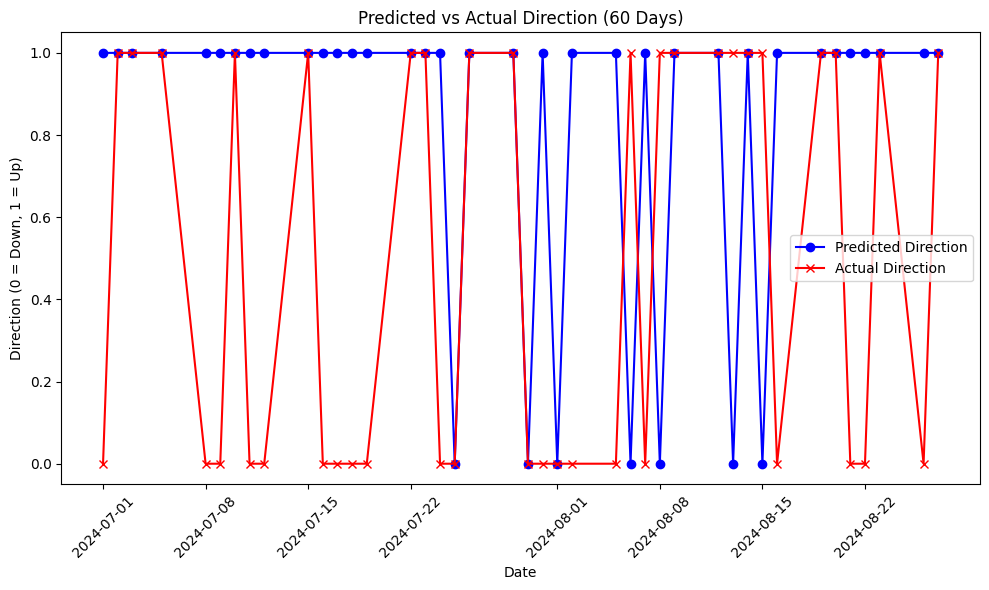

In [ ]:
# Step 2: Create the direction variable (1 if price goes up, 0 if price goes down)
df['direction'] = np.where(df['y'].diff() > 0, 1, 0)

# Step 3: Train the model with the best parameters
model = Prophet(
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=5,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='multiplicative'
)
model.add_regressor('volume')

# Fit the model
model.fit(df)

# Step 4: Make future predictions (60 days ahead)
future_dates = model.make_future_dataframe(periods=60)
future_dates['volume'] = df['volume'].iloc[-1]  # Use the last known volume as a placeholder
predictions = model.predict(future_dates)

# Step 5: Create the predicted direction variable (1 if predicted yhat goes up, 0 if down)
predictions['predicted_direction'] = np.where(predictions['yhat'].diff() > 0, 1, 0)

# Step 6: Download actual future data for comparison
actual_df = yf.download('MSFT', '2024-07-01', '2024-09-15')
actual_df.reset_index(inplace=True)
actual_df = actual_df[['Date', 'Close']]
actual_df.columns = ['ds', 'actual']

# Calculate actual direction based on the actual 'Close' values
actual_df['actual_direction'] = np.where(actual_df['actual'].diff() > 0, 1, 0)

# Step 7: Merge predicted and actual data for evaluation
merged_df = pd.merge(predictions[['ds', 'predicted_direction']], actual_df[['ds', 'actual_direction']], on='ds', how='left')
future_df = merged_df.dropna(subset=['actual_direction'])

# Step 8: Calculate accuracy
accuracy = accuracy_score(future_df['actual_direction'], future_df['predicted_direction'])

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Step 9: Plot actual vs predicted directions
plt.figure(figsize=(10, 6))
plt.plot(future_df['ds'], future_df['predicted_direction'], label='Predicted Direction', color='blue', marker='o')
plt.plot(future_df['ds'], future_df['actual_direction'], label='Actual Direction', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Direction (0 = Down, 1 = Up)')
plt.title('Predicted vs Actual Direction (60 Days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()